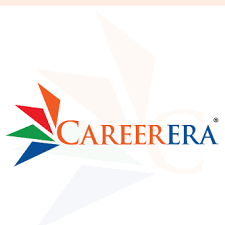

# <span style="color:blue"> ASSIGNMENT QUESTIONS (Logistic Regression)</span>

#### Question 1: Download the dataset from the link: https://drive.google.com/file/d/1APUB8iRBmPui87yr1JMWyoYtj7pcgoDr/view?usp=sharing 
#### and build a model that can preict whether the client has subscribed a term deposit or not using logistic regression technique.

In [1]:
#write your code here............
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#header_names = ['Age', 'job', 'Marital', 'education', 'default', 'balance', 'housing', \
  #            'loan', 'contact', 'day', 'month', 'duration', 'campaign','pdays',\
  #            'previous', 'poutcome','y']
# read in the data
client_data=pd.read_csv('bank-full.csv', sep=";")

In [2]:
client_df=pd.DataFrame(client_data)
client_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
client_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
# Convert Y,Housing,default,loan column into integer
client_df['is_default'] = client_df['default'].apply(lambda row: 1 if row == 'yes' else 0)
client_df['is_housing'] = client_df['housing'].apply(lambda row: 1 if row == 'yes' else 0)
client_df['is_loan'] = client_df['loan'].apply(lambda row: 1 if row == 'yes' else 0)
client_df['target'] = client_df['y'].apply(lambda row: 1 if row == 'yes' else 0)

In [5]:
client_df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'pdays', 'poutcome', 'y'], axis=1, inplace=True)


In [10]:
client_df['month']

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64

In [6]:
# Converting months to numeric
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
client_df['month'] = client_df['month'].map(months)

client_df.head()

,age,balance,day,month,duration,campaign,previous,is_default,is_housing,is_loan,target
0,58,2143,5,5,261,1,0,0,1,0,0
1,44,29,5,5,151,1,0,0,1,0,0
2,33,2,5,5,76,1,0,0,1,1,0
3,47,1506,5,5,92,1,0,0,1,0,0
4,33,1,5,5,198,1,0,0,0,0,0


In [7]:

#The axis=1 argument drop columns
X = client_df.drop('target', axis=1)
y = client_df['target']
X


,age,balance,day,month,duration,campaign,previous,is_default,is_housing,is_loan
0,58,2143,5,5,261,1,0,0,1,0
1,44,29,5,5,151,1,0,0,1,0
2,33,2,5,5,76,1,0,0,1,1
3,47,1506,5,5,92,1,0,0,1,0
4,33,1,5,5,198,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,11,977,3,0,0,0,0
45207,71,1729,17,11,456,2,0,0,0,0
45208,72,5715,17,11,1127,5,3,0,0,0
45209,57,668,17,11,508,4,0,0,0,0


In [37]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 45211, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

,age,balance,day,month,duration,campaign,previous,is_default,is_housing,is_loan
13932,57,658,10,7,724,1,0,0,0,0
9894,37,1699,9,6,63,1,0,0,0,0
39946,35,2823,2,6,102,4,2,0,1,0
9217,35,214,5,6,247,1,0,0,1,1
4124,38,323,19,5,138,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
30403,35,995,5,2,39,1,0,0,0,0
21243,35,750,18,8,233,12,0,0,1,0
42613,35,323,11,1,261,2,0,0,0,0
43567,70,616,27,4,149,2,1,0,0,0


In [22]:
model=LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(x_train,y_train)  # Training the Model

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [25]:
y_pred = model.predict(x_test)  # Predict Test data

In [36]:
print('Accuracy',accuracy_score(y_test,y_pred)*100)
print('Error Rate',(1 - accuracy_score(y_test,y_pred))*100)

Accuracy 88.63209112020347
Error Rate 11.367908879796529


#### Question 2: Download the dataset from the link:
https://drive.google.com/file/d/1_uv8AdwQpnQICeX4mFHA8Z4rFsbK3zgb/view?usp=sharing 
#### Prepare a model for glass classification using logistic regression
##### Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
#write your code here............
glass_data=pd.read_csv('glass.csv')
glass_df=pd.DataFrame(glass_data)
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [62]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [63]:
# Checking for null variable
glass_df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [64]:
glass_df[glass_df.duplicated()]  # Checking for duplicate values
glass_df.drop_duplicates(keep='last',inplace=True)  # Droping  duplicate values

In [65]:
# Normalizing the sclae
X=glass_df.drop('Type',axis=1)
y=glass_df['Type']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64


In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(X)
scaledX

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaledX,y,test_size=0.3,random_state=0)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('x_test :',x_test.shape)
print('y_test :',y_test.shape)

x_train : (149, 9)
y_train : (149,)
x_test : (64, 9)
y_test : (64,)


In [68]:
model=LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(x_train,y_train) # Training the Model

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [69]:
y_pred = model.predict(x_test)  # Predict Test data

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

64.0625

**Question 3:Download the dataset from the below link:
https://drive.google.com/file/d/1lGz2ErF8tmiON45KpaBeNEvJdZ14Wz5Y/view?usp=sharing**
#### and build a model using logistic regression to predict the heart disease where the target variable is "TenYearCHD".

In [71]:
#write your code here............
#Reading the Dataset
patient_data = pd.read_csv('framingham.csv')
patient_df=pd.DataFrame(patient_data)
patient_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [72]:
#Shape of dataset & the Features in terms of rows and columns
print ('No. of Records :', patient_df.shape[0], '\nNo. of Features : ', patient_df.shape[1])

No. of Records : 4238 
No. of Features :  16


In [73]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [74]:
#Examining Null values in each feature
patient_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [94]:
# EDA on the Data Set
corr=patient_df.corr() 

<AxesSubplot:>

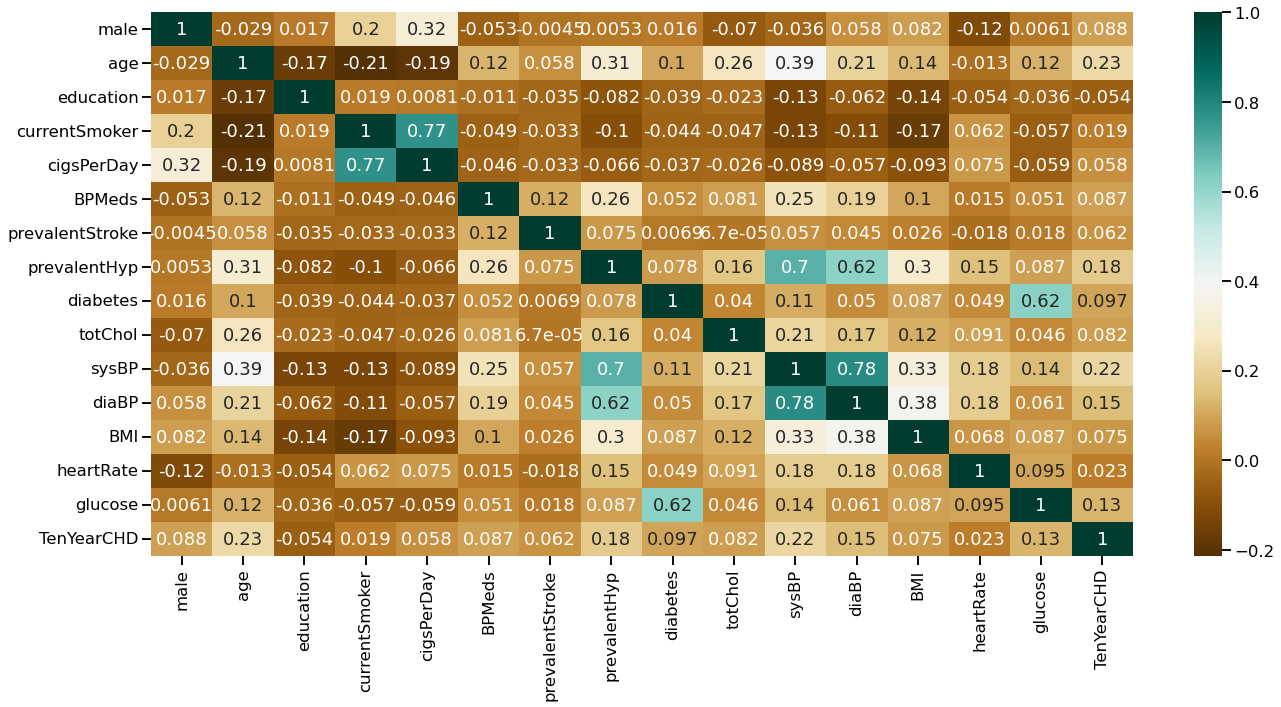

In [101]:
#Visualize correlation between attributes using heatmap
plt.figure(figsize=(22,10))
sns.heatmap(patient_df.corr(), annot=True, cmap='BrBG')

In [102]:
# Find the missing value and replaced it with median value

#User defined function for missing value imputation with median
def impute_median(data):
    return data.fillna(data.median())

In [104]:
#median imputation
patient_df.glucose = patient_df['glucose'].transform(impute_median)
patient_df.education = patient_df['education'].transform(impute_median)
patient_df.heartRate =patient_df['heartRate'].transform(impute_median)
patient_df.totChol = patient_df['totChol'].transform(impute_median)
patient_df.BPMeds =patient_df['BPMeds'].transform(impute_median)

## group by classes that are in relation with other classes

by_currentSmoker = patient_df.groupby(['currentSmoker'])
patient_df.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = patient_df.groupby(['male','age'])
patient_df.BMI = by_age['BMI'].transform(impute_median)

In [106]:
# Rechecking if we have any missing value left

patient_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [107]:
patient_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [116]:
X=patient_df.drop('TenYearCHD',axis=1)
y=patient_df['TenYearCHD']

In [117]:
# Normalizing the Dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(X)
scaledX

array([[ 1.1531919 , -1.23495068,  2.00655919, ...,  0.28729495,
         0.34276147, -0.2013593 ],
       [-0.86715836, -0.41825733,  0.02038662, ...,  0.71945598,
         1.59029076, -0.24509896],
       [ 1.1531919 , -0.18491638, -0.97269966, ..., -0.11294509,
        -0.07308163, -0.5075369 ],
       ...,
       [-0.86715836, -0.18491638,  0.02038662, ..., -0.93306886,
         0.67543595,  0.19229761],
       [-0.86715836, -0.65159829, -0.97269966, ..., -1.63041962,
         0.84177318, -0.15761964],
       [-0.86715836,  0.28176554,  0.02038662, ..., -1.06320827,
         0.34276147,  1.11083042]])

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [119]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(scaledX, y, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3178, 15), (1060, 15), (3178,), (1060,))

In [120]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

patient_reg = LogisticRegression(solver='liblinear')
patient_reg.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

In [122]:
# Predicting the data model
patient_pred = patient_reg.predict(x_test)
patient_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
# Metrics Evaluation
from sklearn.model_selection import cross_val_score
print ('Accuracy Score :', accuracy_score(y_test, patient_pred)*100)
print ('Cross Validation Score : ', cross_val_score(patient_reg, x_train, y_train, cv=5).mean()*100)
print (classification_report(y_test, patient_pred))

#sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='cool', fmt='d'

Accuracy Score : 84.43396226415094
Cross Validation Score :  85.74605061159808
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       890
           1       0.65      0.06      0.12       170

    accuracy                           0.84      1060
   macro avg       0.75      0.53      0.52      1060
weighted avg       0.82      0.84      0.79      1060

